In [ ]:
# Importing the libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings


In [ ]:
# Loading the training set
from subprocess import check_output
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
# Shape of dataset
df.shape

(31173, 6)

In [ ]:
# 1% sample of items
df = df.sample(frac=0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 10813 to 15537
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                3117 non-null   object 
 1   song_id             3117 non-null   object 
 2   source_system_tab   3109 non-null   object 
 3   source_screen_name  3015 non-null   object 
 4   source_type         3110 non-null   object 
 5   target              3117 non-null   float64
dtypes: float64(1), object(5)
memory usage: 170.5+ KB


In [ ]:
# loading song data
songs = pd.read_csv('songs.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42270 entries, 0 to 42269
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      42270 non-null  object 
 1   song_length  42270 non-null  int64  
 2   genre_ids    41503 non-null  object 
 3   artist_name  42269 non-null  object 
 4   composer     24545 non-null  object 
 5   lyricist     11561 non-null  object 
 6   language     42269 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
# join songs data
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                3117 non-null   object 
 1   song_id             3117 non-null   object 
 2   source_system_tab   3109 non-null   object 
 3   source_screen_name  3015 non-null   object 
 4   source_type         3110 non-null   object 
 5   target              3117 non-null   float64
 6   song_length         462 non-null    float64
 7   genre_ids           458 non-null    object 
 8   artist_name         462 non-null    object 
 9   composer            372 non-null    object 
 10  lyricist            292 non-null    object 
 11  language            462 non-null    float64
dtypes: float64(3), object(9)
memory usage: 316.6+ KB


In [ ]:
# loading song data
members = pd.read_csv('members.csv')

In [ ]:
# join songs data 
df = pd.merge(df, members, on='msno', how='left')
del members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    3117 non-null   object 
 1   song_id                 3117 non-null   object 
 2   source_system_tab       3109 non-null   object 
 3   source_screen_name      3015 non-null   object 
 4   source_type             3110 non-null   object 
 5   target                  3117 non-null   float64
 6   song_length             462 non-null    float64
 7   genre_ids               458 non-null    object 
 8   artist_name             462 non-null    object 
 9   composer                372 non-null    object 
 10  lyricist                292 non-null    object 
 11  language                462 non-null    float64
 12  city                    3117 non-null   int64  
 13  bd                      3117 non-null   int64  
 14  gender                  1889 non-null   

In [ ]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    3117 non-null   object 
 1   song_id                 3117 non-null   object 
 2   source_system_tab       3117 non-null   object 
 3   source_screen_name      3117 non-null   object 
 4   source_type             3117 non-null   object 
 5   target                  3117 non-null   float64
 6   song_length             3117 non-null   float64
 7   genre_ids               3117 non-null   object 
 8   artist_name             3117 non-null   object 
 9   composer                3117 non-null   object 
 10  lyricist                3117 non-null   object 
 11  language                3117 non-null   float64
 12  city                    3117 non-null   int64  
 13  bd                      3117 non-null   int64  
 14  gender                  3117 non-null   

In [ ]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [ ]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [ ]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,0.020492,-0.036219,-0.039307,-0.047331,0.009492,-0.002544,-0.003432,-0.003488,-0.033212,-0.012654,0.034510,0.059612,0.006296,-0.065667,0.014259,-0.018184,-0.026009,-0.031233,0.058284,-0.024425,-0.000436,-0.032569,-0.012879
song_id,0.020492,1.000000,0.010137,-0.012036,-0.033008,0.032171,0.037150,-0.040524,0.011996,-0.051062,-0.035084,0.025280,0.017092,0.024418,-0.033155,0.000841,-0.010005,-0.033090,-0.011200,0.013284,-0.006019,-0.018986,-0.015099,0.017208
source_system_tab,-0.036219,0.010137,1.000000,-0.027616,-0.246791,0.104801,0.006477,0.005127,-0.014163,0.015432,-0.016549,0.001617,0.003501,-0.041508,0.015335,0.012291,-0.008376,-0.000448,0.014107,-0.036289,0.014897,0.004848,0.002970,0.010860
source_screen_name,-0.039307,-0.012036,-0.027616,1.000000,0.295698,-0.103111,0.008273,-0.003733,-0.007525,0.007768,0.009851,-0.007632,-0.023421,-0.046204,0.016289,-0.020799,0.053880,-0.069154,0.055354,0.022081,0.035843,-0.061212,0.006533,0.034359
source_type,-0.047331,-0.033008,-0.246791,0.295698,1.000000,-0.182188,-0.002897,-0.001350,0.015710,0.021698,0.018353,-0.022245,-0.031263,0.005383,-0.009898,0.013219,-0.010221,0.012683,-0.023275,0.031841,-0.006762,-0.016242,0.044445,-0.002066
target,0.009492,0.032171,0.104801,-0.103111,-0.182188,1.000000,0.010460,-0.013629,-0.026387,0.005423,0.004202,0.018458,-0.001285,-0.003444,-0.001903,-0.016014,0.016908,0.088541,0.020379,0.032180,0.023603,0.042971,0.033144,0.031091
song_length,-0.002544,0.037150,0.006477,0.008273,-0.002897,0.010460,1.000000,-0.920362,0.200500,-0.006384,0.401028,0.546423,0.008548,0.009752,-0.005897,0.012093,-0.009422,-0.043254,-0.009782,0.013646,-0.020745,-0.036542,0.009163,-0.011640
genre_ids,-0.003432,-0.040524,0.005127,-0.003733,-0.001350,-0.013629,-0.920362,1.000000,-0.089076,0.091989,-0.331912,-0.646833,-0.007529,-0.006395,0.014036,-0.003415,0.001538,0.055967,0.001723,-0.025049,0.022818,0.043584,-0.003837,0.010484
artist_name,-0.003488,0.011996,-0.014163,-0.007525,0.015710,-0.026387,0.200500,-0.089076,1.000000,0.359527,0.321372,-0.389236,-0.007672,0.001664,-0.001027,0.012622,0.009667,-0.008052,0.003365,-0.002548,-0.019826,-0.011514,0.011217,-0.017286
composer,-0.033212,-0.051062,0.015432,0.007768,0.021698,0.005423,-0.006384,0.091989,0.359527,1.000000,0.693705,-0.443249,-0.018400,-0.021007,0.003742,0.008992,0.007019,0.007228,0.001685,-0.025446,0.020821,-0.017825,0.036988,0.011670


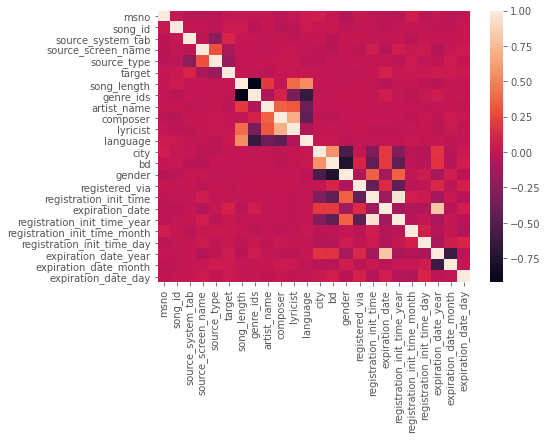

In [ ]:
# Heat map of the data
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [ ]:
# Creat model
# Parameters were selected by Randomized Grid Search with Stratified Shuffle Split Cross Validation.
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

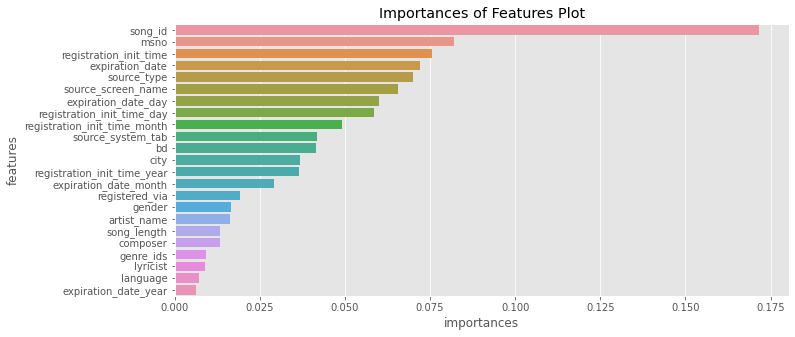

In [ ]:
# Importance of Features Plot
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
# Actual data of feature
model.feature_importances_

array([0.08200274, 0.17169523, 0.04171313, 0.06556805, 0.07001438,
       0.01336746, 0.00911425, 0.01611931, 0.01334971, 0.00882882,
       0.00724933, 0.03686903, 0.04147878, 0.01652948, 0.01918509,
       0.0754553 , 0.0721079 , 0.03651812, 0.04914477, 0.05846616,
       0.00625915, 0.02909218, 0.05987161])

In [ ]:
# Drop the column which is less important and again ad to list
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'bd',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_month',
 'registration_init_time_day',
 'expiration_date_day']

In [ ]:
target = df.pop('target')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   msno                          3117 non-null   int16
 1   song_id                       3117 non-null   int16
 2   source_system_tab             3117 non-null   int8 
 3   source_screen_name            3117 non-null   int8 
 4   source_type                   3117 non-null   int8 
 5   bd                            3117 non-null   int64
 6   registration_init_time        3117 non-null   int16
 7   expiration_date               3117 non-null   int16
 8   registration_init_time_month  3117 non-null   int64
 9   registration_init_time_day    3117 non-null   int64
 10  expiration_date_day           3117 non-null   int64
dtypes: int16(4), int64(4), int8(3)
memory usage: 155.2 KB


In [ ]:
# Predict and result of random forest
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

         0.0       0.54      0.37      0.43       230
         1.0       0.81      0.90      0.85       706

    accuracy                           0.77       936
   macro avg       0.67      0.63      0.64       936
weighted avg       0.74      0.77      0.75       936

